In [85]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

In [19]:
df = load_digits()
X, y = df.data, df.target

In [47]:
clf = DecisionTreeClassifier()
cv = cross_val_score(cv=10, estimator=clf, n_jobs=4, X=X, y=y)

In [90]:
def write_cv(cv, sub):
    with open(sub, "w") as fout:
        fout.write(str(cv.mean()))

In [56]:
write_cv(cv)

In [101]:
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)
cv = cross_val_score(cv=10, estimator=bagging, n_jobs=4, X=X, y=y)
write_cv(cv, "sub2.txt")

In [102]:
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                            max_features=np.int(np.sqrt(X.shape[1])))
cv = cross_val_score(cv=10, estimator=bagging, n_jobs=4, X=X, y=y)
write_cv(cv, "sub3.txt")

In [103]:
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_features=np.int(np.sqrt(X.shape[1]))), 
                            n_estimators=100)
cv = cross_val_score(cv=10, estimator=bagging, n_jobs=4, X=X, y=y)
write_cv(cv, "sub4.txt")

In [108]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
%matplotlib inline

([<matplotlib.lines.Line2D at 0x7f2c971fd898>],
 [0.95330205383773503,
  0.95330205383773503,
  0.95330205383773503,
  0.95330205383773503,
  0.95330205383773503])

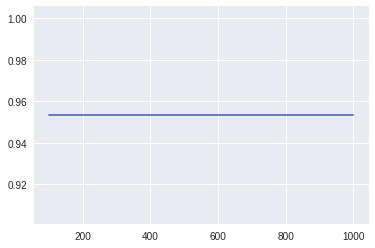

In [117]:
# 1) Случайный лес сильно переобучается с ростом количества деревьев - НЕТ
cv_scores = []
n_range = [100,200,300,500, 1000]
for n_est in n_range:
    rf = RandomForestClassifier(n_estimators=rf, n_jobs=-1)
    cv = cross_val_score(cv=10, estimator=bagging, n_jobs=4, X=X, y=y)
    cv_scores.append(cv.mean())
sns.plt.plot(n_range, cv_scores), cv_scores

([<matplotlib.lines.Line2D at 0x7f2c9718f7b8>],
 [0.88300014988768927,
  0.9210376343771951,
  0.93383693104268473,
  0.95437296774486047,
  0.9555951638561464])

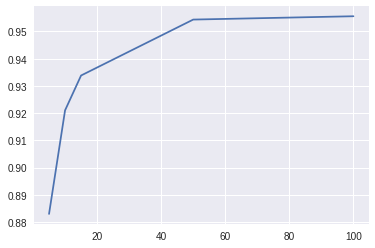

In [118]:
# 2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев - ДА
cv_scores = []
n_range = [5,10,15, 50, 100]
for n_est in n_range:
    rf = RandomForestClassifier(n_estimators=n_est, n_jobs=-1)
    cv = cross_val_score(cv=10, estimator=rf, n_jobs=4, X=X, y=y)
    cv_scores.append(cv.mean())
sns.plt.plot(n_range, cv_scores), cv_scores

In [119]:
"""3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, 
а затем качество существенно не меняется. - ДА"""

([<matplotlib.lines.Line2D at 0x7f2c96f317b8>],
 [0.95217215487509832,
  0.94998874598627836,
  0.94441049162178159,
  0.94271301839092614,
  0.93994084179692228,
  0.93217939322169696,
  0.92709457174904841])

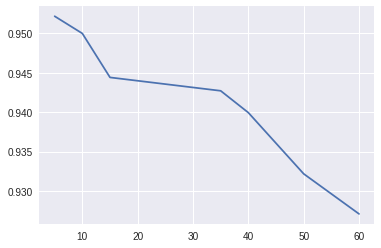

In [123]:
"""4) При большом количестве признаков (для данного датасета - 40, 50) 
качество классификации становится хуже, чем при малом количестве признаков (5, 10). 
Это связано с тем, что чем меньше признаков выбирается в каждом узле, 
тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), 
и тем лучше работает их композиция. - ДА"""

cv_scores = []
n_feat = [5,10,15, 35, 40, 50, 60]
for nf in n_feat:
    rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_features=nf)
    cv = cross_val_score(cv=10, estimator=rf, n_jobs=4, X=X, y=y)
    cv_scores.append(cv.mean())
sns.plt.plot(n_feat, cv_scores), cv_scores

In [ ]:
"""5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно.
- НЕТ"""

([<matplotlib.lines.Line2D at 0x7f2c96ce6198>],
 [0.92478365649488781,
  0.93878489644851215,
  0.94157958885258064,
  0.9555951638561464])

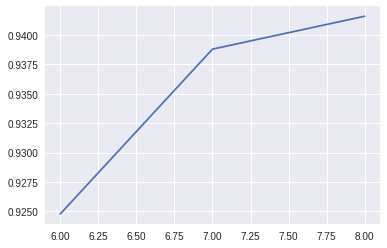

In [130]:
"""6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, 
чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.
-НЕТ"""
cv_scores = []
max_depth = [6,7,8,None]
for md in max_depth:
    rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_features=8, max_depth=md)
    cv = cross_val_score(cv=10, estimator=rf, n_jobs=4, X=X, y=y)
    cv_scores.append(cv.mean())
sns.plt.plot(max_depth, cv_scores), cv_scores


In [131]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_features=8)
cv = cross_val_score(cv=10, estimator=rf, n_jobs=4, X=X, y=y)
cv.mean()

0.9555951638561464

In [132]:
"""7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).
-ДА"""
to_write = [2,3,4,7]
with open("sub_f.txt", "w") as fout:
    fout.write(" ".join(map(str, to_write)))